## Naive Baye's Classifier

    The Naive Bayes Classifier is a simple classifier that classifies based on probabilities of events. It is the applied
    commonly to text classification.

### Text Classification:

    - Text classification is used in segregation of (movie reviews, hotel reviews, news data, customer support emails,
      complains, product review etc).
    - For many real life cases training a custom text model classification model proves to be much more accurate.

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [4]:
from wordcloud import WordCloud

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [6]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [7]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [8]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

### Data Loading

In [10]:
df = pd.read_csv('datasets/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [11]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
df.shape

(23486, 10)

In [13]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [15]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

## Data Wrangling

### Handling Null Values

In [16]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [17]:
df['Review Text'].isna().sum() / df.shape[0]

0.035978881035510515

In [18]:
df_reviews = df.copy()

In [19]:
df_reviews.dropna(axis=0, inplace=True)

In [20]:
df_reviews.shape

(19662, 10)

In [21]:
df_reviews.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [22]:
df.shape[0] - df_reviews.shape[0]

3824

## Exploratory Data Analysis

In [23]:
df_reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [24]:
df_reviews.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [25]:
df_reviews.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177,2.652477
std,200.227528,12.258122,1.112224,0.385708,5.834285
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [26]:
df_reviews['Division Name'].unique()

array(['General', 'General Petite', 'Initmates'], dtype=object)

In [27]:
df_reviews['Division Name'].value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: Division Name, dtype: int64

<AxesSubplot:xlabel='Division Name', ylabel='count'>

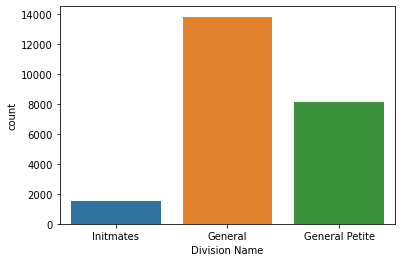

In [28]:
sns.countplot(df['Division Name'])

In [29]:
df_reviews['Department Name'].unique()

array(['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend'],
      dtype=object)

In [30]:
df_reviews['Department Name'].value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Department Name, dtype: int64

<AxesSubplot:xlabel='Department Name', ylabel='count'>

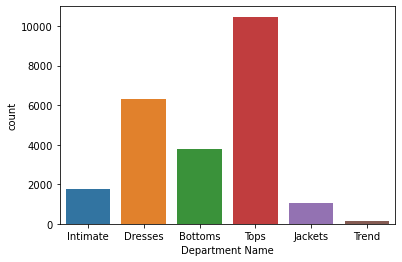

In [31]:
sns.countplot(df['Department Name'])

In [32]:
df_reviews['Class Name'].unique()

array(['Dresses', 'Pants', 'Blouses', 'Knits', 'Intimates', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Shorts', 'Legwear', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [33]:
df_reviews['Class Name'].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Chemises             1
Casual bottoms       1
Name: Class Name, dtype: int64

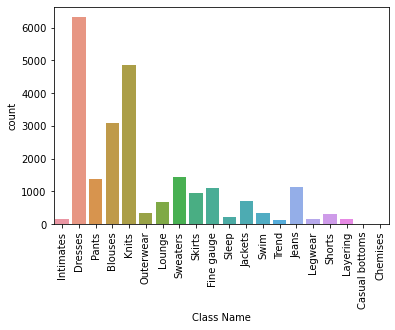

In [34]:
sns.countplot(df['Class Name'])
plt.xticks(rotation=90)
plt.show()

In [35]:
df_reviews['Clothing ID'].nunique()

1095

**Clothing ID**

    1). The number of unique value in "Clothing ID" is significantly lesser than thenumber of rows.
    2). This is shows that "Clothing ID" are not uniques. This is understandable given that "Clothing ID" is the product
        that is being reviewed.
    3). Hence, This shows the same product was purchased and reviewed by multiple customers.
    4). However, This also means that we can find out what are popular items (those appear more than 'n' times).
    5). Lets set an arbitary random number 'n' to be 100.

In [36]:
famous_clothing_id = df_reviews['Clothing ID'].value_counts()

In [38]:
famous_clothing_id[famous_clothing_id > 100]

1078    871
862     658
1094    651
1081    487
829     452
872     450
1110    419
868     370
895     336
867     291
936     289
1095    287
850     280
1077    251
1059    247
863     243
1080    241
1086    241
860     237
1083    214
861     203
873     197
1033    190
1092    187
927     187
828     181
1056    180
820     177
1022    172
836     172
1072    166
1008    163
1104    147
984     144
831     138
877     133
1020    133
833     132
854     130
834     125
864     125
835     121
1082    119
1035    115
1099    115
940     113
1087    109
865     108
907     106
909     102
875     101
Name: Clothing ID, dtype: int64

In [39]:
len(famous_clothing_id[famous_clothing_id > 100])

51

In [40]:
df_reviews

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**Age**

    1). The age group of reviewers spans over wide range of age , we would now categorize them into seperate bins (10-20)
        (20-30) and so on..
    2). This enables subsequent analysis to be more meaningful because based on sentiments and ratings we can group
        accodrding to age.

In [41]:
bins = np.arange(0, 101, 10)

In [42]:
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [43]:
df_reviews['Age Group'] = pd.cut(df_reviews['Age'], bins)

In [44]:
df_reviews

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(50, 60]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(40, 50]"
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"(40, 50]"
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"(30, 40]"
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"(40, 50]"
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"(30, 40]"
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"(20, 30]"


In [45]:
rating_age_df = df_reviews.groupby(['Rating', 'Age Group']).size().reset_index(name='n')

In [46]:
rating_age_df

,Rating,Age Group,n
0,1,"(0, 10]",0
1,1,"(10, 20]",4
2,1,"(20, 30]",97
3,1,"(30, 40]",229
4,1,"(40, 50]",170
5,1,"(50, 60]",121
6,1,"(60, 70]",60
7,1,"(70, 80]",8
8,1,"(80, 90]",1
9,1,"(90, 100]",1


In [47]:
rating_age_pivot = pd.pivot_table(rating_age_df, index=['Age Group'], values=['n'], columns=['Rating'], aggfunc=[np.sum])

In [48]:
rating_age_pivot

sum                      
             n                      
Rating       1    2    3     4     5
Age Group                           
(0, 10]      0    0    0     0     0
(10, 20]     4    3   15    31    70
(20, 30]    97  182  375   569  1460
(30, 40]   229  488  856  1460  3493
(40, 50]   170  372  645  1138  2693
(50, 60]   121  206  365   692  1886
(60, 70]    60   86  179   349  1048
(70, 80]     8   18   24    43   145
(80, 90]     1    4    4     6    59
(90, 100]    1    1    1     1     4

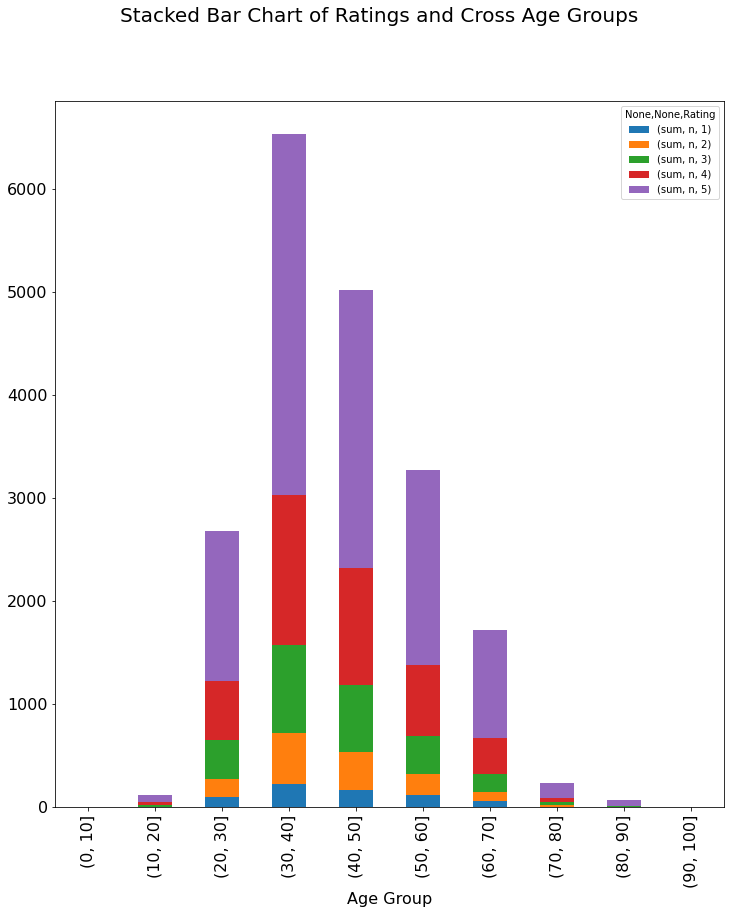

In [49]:
fig = plt.figure(figsize=(12,13))
ax = fig.add_subplot(111)
rating_age_pivot.plot(kind='bar',
                      stacked=True,
                      fontsize=16,
                      ax=ax
                     )
ax.set_xlabel('Age Group', fontsize=16)
fig.suptitle('Stacked Bar Chart of Ratings and Cross Age Groups', fontsize=20)
plt.show()

In [50]:
df_reviews

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(50, 60]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(40, 50]"
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"(40, 50]"
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"(30, 40]"
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"(40, 50]"
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"(30, 40]"
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"(20, 30]"


## Text Normalization on "Review" Text

In [51]:
def clean_string(s):
    r1 = re.sub(r'[^A-Za-z]+',' ', str(s))
    r1 = r1.strip().lower()
    
    # removing stopwords
    
    no_stp_words = []
    if r1 not in stopwords.words():
        no_stp_words.append(r1)

    # performing stemming
    
    stemmer = PorterStemmer()
    final_list = []
    for i in no_stp_words:
        final_list.append(stemmer.stem(str(i)))
    
    return final_list

In [52]:
reviews_df = df_reviews[['Clothing ID','Review Text','Age Group','Recommended IND']]

In [53]:
reviews_df.head()

,Clothing ID,Review Text,Age Group,Recommended IND
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1


In [54]:
reviews_df.shape

(19662, 4)

In [55]:
reviews_df['Filtered Review'] = reviews_df['Review Text'].apply(clean_string)

In [56]:
reviews_df.head()

,Clothing ID,Review Text,Age Group,Recommended IND,Filtered Review
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...


In [57]:
reviews_df['Filtered Review'][2]

['i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c']

In [58]:
reviews_df['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

## Sentiment Analysis

In [59]:
sta = SentimentIntensityAnalyzer()

In [60]:
ones_arr = np.ones(reviews_df.shape[0])

In [61]:
ones_arr

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
reviews_df['Compound Score'] = ones_arr

In [63]:
reviews_df.head()

,Clothing ID,Review Text,Age Group,Recommended IND,Filtered Review,Compound Score
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,1.0
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,1.0
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,1.0
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,1.0
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,1.0


In [65]:
for i in range(reviews_df.shape[0]):
    element = reviews_df['Filtered Review'].iloc[i][0]
    score = sta.polarity_scores(element)
    compound = score['compound']
    reviews_df['Compound Score'].iloc[i] = compound

In [66]:
reviews_df.head()

,Clothing ID,Review Text,Age Group,Recommended IND,Filtered Review,Compound Score
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,0.9398
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,0.7192
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,0.9162
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,0.9419
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,0.4576


In [67]:
category = []
for i in reviews_df['Compound Score']:
    if i > 0:
        category.append('Positive')
    elif i < 0:
        category.append('Negative')
    else:
        category.append('Neutral')
reviews_df['Sentiment Category'] = category

In [70]:
reviews_df.sample(20)

,Clothing ID,Review Text,Age Group,Recommended IND,Filtered Review,Compound Score,Sentiment Category
2697,859,This top is totally adorable. it's one of my f...,"(30, 40]",1,[this top is totally adorable it s one of my f...,0.9441,Positive
21166,862,"I love this sweater!! love the length, it's a ...","(20, 30]",1,[i love this sweater love the length it s a bi...,0.9824,Positive
20026,1009,I bought this skirt in the store a few months ...,"(20, 30]",1,[i bought this skirt in the store a few months...,0.9527,Positive
8468,863,I agree with other reviewers that this top run...,"(40, 50]",1,[i agree with other reviewers that this top ru...,0.8591,Positive
10835,1038,These jeans are fantastic! i've worn them once...,"(40, 50]",1,[these jeans are fantastic i ve worn them once...,0.9272,Positive
10212,1096,I loved this on the cover of the august catalo...,"(50, 60]",1,[i loved this on the cover of the august catal...,0.8714,Positive
9507,860,"The tank looks nothing like the one pictured, ...","(60, 70]",0,[the tank looks nothing like the one pictured ...,-0.3421,Negative
22089,850,This is a very pretty blouse. the fabric is li...,"(50, 60]",1,[this is a very pretty blouse the fabric is li...,0.5413,Positive
17486,895,Love this sweater so much that i'm going to or...,"(40, 50]",1,[love this sweater so much that i m going to o...,0.9607,Positive
21631,1086,"I purchased the grey color, and i love love lo...","(40, 50]",1,[i purchased the grey color and i love love lo...,0.9798,Positive


In [72]:
reviews_df['Sentiment Category'].value_counts()

Positive    18447
Negative     1094
Neutral       121
Name: Sentiment Category, dtype: int64

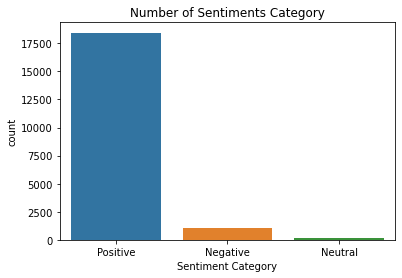

In [74]:
sns.countplot(reviews_df['Sentiment Category'])
plt.title('Number of Sentiments Category')
plt.show()

**There are huge amount of positive reviews which we have figured out in the above process, We can find the list of all such words which shows the positive sentiments of the user for their purchase.**

## Use of Word-Cloud

In [81]:
positive_review = reviews_df.loc[reviews_df['Sentiment Category'] == 'Positive', 'Filtered Review'].tolist()

In [86]:
positive_review[:5]

[['i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c'],
 ['i love love love this jumpsuit it s fun flirty and fabulous every time i wear it i get nothing but great compli'],
 ['this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt'],
 ['i love tracy reese dresses but this one is not for the very petite i am just under feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dr

In [89]:
pos_rev_desc = ''
for i in positive_review:
    for j in i:
        pos_rev_desc = pos_rev_desc +''+ j

In [90]:
print(pos_rev_desc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



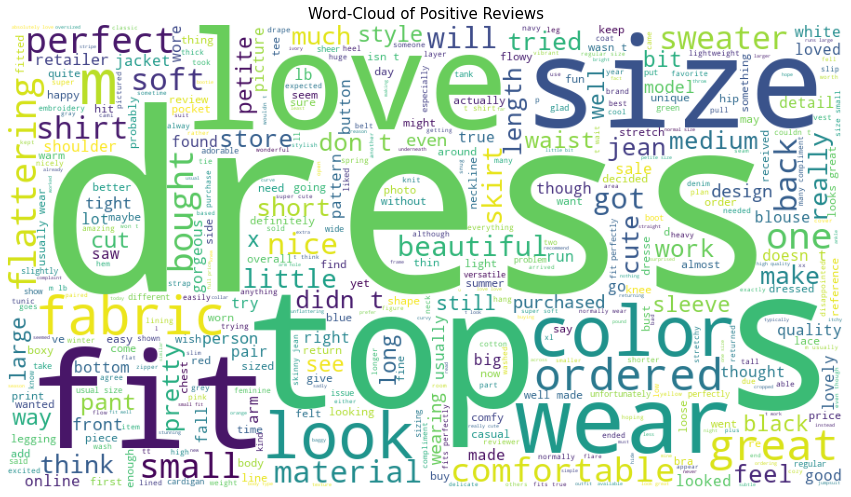

In [91]:
fig = plt.figure(figsize=(15,20))
desc_cloud = WordCloud(width=900,
                       height=500,
                       background_color='white',
                       max_words=450,
                       relative_scaling=1.0).generate(pos_rev_desc)
plt.imshow(desc_cloud)
plt.axis('off')
plt.title('Word-Cloud of Positive Reviews', fontsize=15)
plt.show()

In [92]:
negative_review = reviews_df.loc[reviews_df['Sentiment Category'] == 'Negative', 'Filtered Review'].tolist()

In [93]:
negative_review[0:5]

[['i ordered this in carbon for store pick up and had a ton of stuff as always to try on and used this top to pair skirts and pants everything went with it the color is really nice charcoal with shimmer and went well with pencil skirts flare pants etc my only compaint is it is a bit big sleeves are long and it doesn t go in petite also a bit loose for me but no xxs so i kept it and wil ldecide later since the light color is already sold out in hte smallest s'],
 ['i m and lbs i ordered the s petite to make sure the length wasn t too long i typically wear an xs regular in retailer dresses if you re less busty b cup or smaller a s petite will fit you perfectly snug but not tight i love that i could dress it up for a party or down for work i love that the tulle is longer then the fabric underneath'],
 ['this is a nice choice for holiday gatherings i like that the length grazes the knee so it is conservative enough for office related gatherings the size small fit me well i am usually a siz

In [94]:
neg_rev_desc = ''
for i in negative_review:
    for j in i:
        neg_rev_desc = neg_rev_desc +''+ j

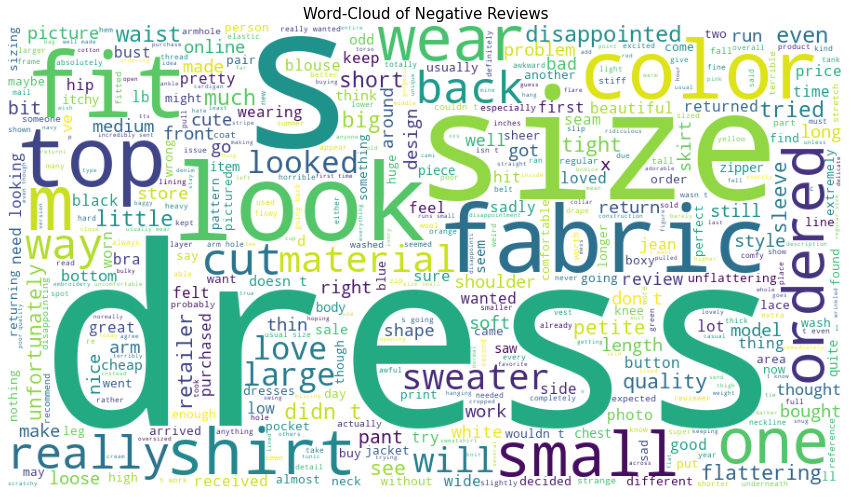

In [95]:
fig = plt.figure(figsize=(15,20))
desc_neg_cloud = WordCloud(width=900,
                       height=500,
                       background_color='white',
                       max_words=450,
                       relative_scaling=1.0).generate(neg_rev_desc)
plt.imshow(desc_neg_cloud)
plt.axis('off')
plt.title('Word-Cloud of Negative Reviews', fontsize=15)
plt.show()

## Applying Naive Bayes Classifier Algorithm

In [96]:
reviews_df.head()

,Clothing ID,Review Text,Age Group,Recommended IND,Filtered Review,Compound Score,Sentiment Category
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,0.9398,Positive
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,0.7192,Positive
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,0.9162,Positive
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,0.9419,Positive
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,0.4576,Positive


### Input & Target Variable

In [97]:
x = reviews_df['Sentiment Category']
y = reviews_df['Recommended IND']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [100]:
x_train

21738    Positive
12405    Positive
16597    Positive
20250    Positive
5278     Positive
           ...   
15020    Positive
186      Positive
22313    Positive
17360    Negative
14136    Positive
Name: Sentiment Category, Length: 14746, dtype: object

In [102]:
y_train

21738    1
12405    1
16597    1
20250    1
5278     1
        ..
15020    1
186      1
22313    1
17360    1
14136    1
Name: Recommended IND, Length: 14746, dtype: int64

In [103]:
x_test

18558    Positive
21482    Positive
1706     Positive
14323    Positive
9647     Positive
           ...   
5942     Positive
20462    Positive
8962     Positive
15362    Positive
1640     Positive
Name: Sentiment Category, Length: 4916, dtype: object

In [104]:
y_test

18558    1
21482    0
1706     1
14323    1
9647     1
        ..
5942     0
20462    0
8962     1
15362    1
1640     1
Name: Recommended IND, Length: 4916, dtype: int64

### Model Transformation

In [105]:
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [106]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [107]:
x_train_tfidf = tfidf.fit_transform(x_train_cv)
x_test_tfidf = tfidf.transform(x_test_cv)

### Multinomial Naive Bayes Model

In [108]:
mnb_clf = MultinomialNB()

In [109]:
mnb_clf.fit(x_train_tfidf, y_train)

MultinomialNB()

In [110]:
y_pred = mnb_clf.predict(x_test_tfidf)

In [111]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Confusion Matrix

In [112]:
cm = confusion_matrix(y_test, y_pred)

In [113]:
print(cm)

[[ 172  744]
 [ 106 3894]]


In [116]:
print("True Negative:", cm[0][0])
print("False Negative:", cm[1][0])
print("True Positive:", cm[1][1])
print("False Positive:", cm[0][1])
print("Accuracy",(cm[0][0]+cm[1][1])/sum(sum(cm)))

True Negative: 172
False Negative: 106
True Positive: 3894
False Positive: 744
Accuracy 0.8270951993490643
